# Human Activity Recognition

### 데이터 탐색

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_name_df = pd.read_csv('../00_data/UCI_HAR_Dataset/features.txt', sep='\s+',
                             header=None, names=['col_index', 'col_name'])
feature_name_df.head()

,col_index,col_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [3]:
feature_dup_df = feature_name_df.groupby('col_name').count()
feature_dup_df.head()

,col_index
col_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1


In [4]:
feature_dup_df[feature_dup_df['col_index'] > 1].head()

,col_index
col_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
feature_dup_df[feature_dup_df['col_index'] > 1].count()

col_index    42
dtype: int64

In [6]:
feature_cum_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('col_name').cumcount()})
feature_cum_df.reset_index(inplace=True)
feature_cum_df.head()

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [7]:
feature_name_df.head()

,col_index,col_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [8]:
new_df = pd.merge(feature_name_df.reset_index(), feature_cum_df)
new_df.head()

,index,col_index,col_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [9]:
new_df['col_name'] = new_df[['col_name', 'dup_cnt']].\
    apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
new_df.head()

,index,col_index,col_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [10]:
new_df = new_df.drop(['index'], axis=1)
new_df.head()

,col_index,col_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [11]:
def get_new_feature_name_df(old_df):
    dup_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('col_name').cumcount()})
    new_df = pd.merge(old_df.reset_index(), dup_df.reset_index())
    new_df['col_name'] = new_df[['col_name', 'dup_cnt']].\
        apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_df = new_df.drop(['index'], axis=1)
    return new_df

In [12]:
new_feature_df = get_new_feature_name_df(feature_name_df)
new_feature_df.head()

,col_index,col_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [13]:
feature_list = list(new_feature_df.col_name.values)
feature_list[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [14]:
X_train = pd.read_csv('../00_data/UCI_HAR_Dataset/train/X_train.txt', 
                           header=None, delim_whitespace=True, names=feature_list)
X_test = pd.read_csv('../00_data/UCI_HAR_Dataset/test/X_test.txt', 
                           header=None, delim_whitespace=True, names=feature_list)
y_train = pd.read_csv('../00_data/UCI_HAR_Dataset/train/y_train.txt', 
                           header=None, delim_whitespace=True, names=['action'])
y_test = pd.read_csv('../00_data/UCI_HAR_Dataset/test/y_test.txt', 
                           header=None, delim_whitespace=True, names=['action'])

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### DecisionTreeClassifier로 학습/예측/평가 수행

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)
accuracy_score(y_test, pred_dt)

0.8598574821852731

In [17]:
# DecisionTreeClassifier의 하이퍼 파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### GridSearchCV로 최적의 하이퍼 파라미터 도출

In [18]:
from sklearn.model_selection import GridSearchCV

- max_depth 도출

In [19]:
params = {
    'max_depth': [6, 8, 10, 12, 16, 20]
}
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print(f'최적 파라미터: {grid_cv.best_params_}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished
최고 평균 정확도: 0.8581
최적 파라미터: {'max_depth': 10}


In [20]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_max_depth', 'mean_test_score']]
df

,param_max_depth,mean_test_score
0,6,0.846710
1,8,0.850796
2,10,0.858145
3,12,0.836790
4,16,0.839372
5,20,0.847398


In [21]:
params = {
    'max_depth': [8, 10, 12, 14]
}
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   52.8s finished
최고 평균 정확도: 0.8489
최적 파라미터: {'max_depth': 8}


In [22]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_max_depth', 'mean_test_score']]
df

,param_max_depth,mean_test_score
0,8,0.848892
1,10,0.844272
2,12,0.845223
3,14,0.840191


- min_samples_split 도출

In [23]:
params = {
    'max_depth': [12, 14, 16, 18],
    'min_samples_split': [12, 16, 20, 24]
}
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.0min finished
최고 평균 정확도: 0.8484
최적 파라미터: {'max_depth': 14, 'min_samples_split': 12}


In [24]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]
df

,param_max_depth,param_min_samples_split,mean_test_score
0,12,12,0.848079
1,12,16,0.846176
2,12,20,0.845630
3,12,24,0.844000
4,14,12,0.848351
5,14,16,0.842774
6,14,20,0.844270
7,14,24,0.844271
8,16,12,0.845086
9,16,16,0.846582


### 최적 모델

In [25]:
best_dtc = grid_cv.best_estimator_
pred = best_dtc.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'테스트 셋에 대한 정확도: {acc:.4f}')

테스트 셋에 대한 정확도: 0.8653


### 중요도가 높은 Feature 시각화

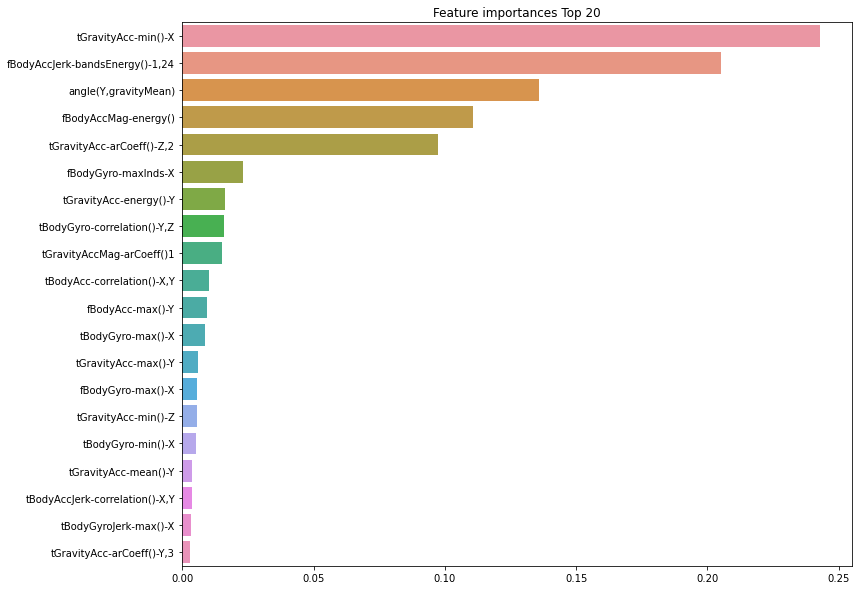

In [26]:
import seaborn as sns

feature_importances = pd.Series(best_dtc.feature_importances_, index=feature_list)
top20_feature = feature_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(12,10))
plt.title('Feature importances Top 20')
sns.barplot(x=top20_feature, y=top20_feature.index)
plt.show()